# Keep the [NB Documentation](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) open throughout the exercise

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../data/sms_spam.csv')

In [3]:
data.sample(10)

,label,msg
2554,ham,�� give me some time to walk there.
1221,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
1036,ham,"Hello baby, did you get back to your mom's ? A..."
589,ham,Ya srsly better than yi tho
3574,spam,You won't believe it but it's true. It's Incre...
1914,ham,You want to go?
5115,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
1000,ham,"Aight will do, thanks again for comin out"
270,spam,Ringtone Club: Get the UK singles chart on you...
1868,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...


In [4]:
# let's look at the counts of spam and ham
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

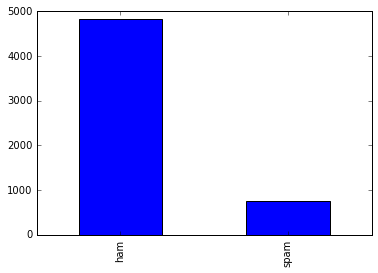

In [5]:
# make a bar chart for spam and ham
data.label.value_counts().plot(kind='bar')

In [6]:
data.describe()

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# now we need to convert our label to a categorical variable for the model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [8]:
# make our y column
data['y'] = pd.Categorical(data['label'])

In [9]:
data.sample(5)

,label,msg,y
4497,ham,"In case you wake up wondering where I am, I fo...",ham
4092,ham,Hey doc pls I want to get nice t shirt for my ...,ham
57,ham,"Sorry, I'll call later in meeting.",ham
3459,ham,Have your lunch and come quickly and open the ...,ham
2385,ham,"Sorry, I'll call later",ham


## Converting text to vectors

`sklearn` comes with many built-in feature extraction and manipulation tools. For dealing with text data, there is the  `sklearn.feature_extraction.text` module, which contains the **`CountVectorizer`** and the `TfidfVectorizer`.

### `CountVectorizer`

This class transforms an array-like (list, dataframe column, array) of strings into a matrix where each column represents a token (word or phrase) and each row represents the sample.

For example, if we had a two-element array ["Hello good day", "Good day to you"], we would create a matrix with 2 rows (one for each sample) and 5 columns (one for every unique word). The matrix would look like this:

hello|good|day|to|you
--|--|--|--|--
1|1|1|0|0
0|1|1|1|1

The `CountVectorizer` (and most feature extraction methods in sklearn) follows a very simple interface:
- `fit` takes a dataset and learns the features it's trying to extract. In this case that means that the algorithm learns the vocabulary of all samples
- `transform` takes a dataset and produces the matrix as described above, based on the vocabulary (or feature elements) it learned.
- `fit_transform` combines the two steps at once.

For example, you may want to fit a vocabulary to a training set, transform the training set to train a model and then continually transform any new incoming examples you want to classify. You will generally only perform the fit step once but the transform step many times for any new datasets.

## First we will convert the text into feature vectors which can be used for machine learning purposes.

We will use the scikit function of CountVectorizer to 'convert text into a matrix of token counts'

 http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# let's look at a simple example
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']
train_labels = ['not_desperate',
                'not_desperate',
                'desperate']
# ignore in case ppl used weird text like smileys or foreign languages
vect = CountVectorizer(decode_error='ignore')
vect.fit(train_simple)
vect.get_feature_names()

[u'cab', u'call', u'me', u'please', u'tonight', u'you']

In [12]:
# by default CountVectorizer does ngram of 1
# we'll use unigrams for the rest of this exercise

# transform to make ready for dataframe
vect_trans = vect.transform(train_simple)
# let's look at the dataset
vect_trans.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [13]:
# put it all in a dataframe
df = pd.DataFrame(vect_trans.toarray())
df.head()

,0,1,2,3,4,5
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [14]:
# now let's add the labels
df['labels'] = train_labels

In [15]:
df.head()

,0,1,2,3,4,5,labels
0,0,1,0,0,1,1,not_desperate
1,1,1,1,0,0,0,not_desperate
2,0,1,1,2,0,0,desperate


## Now we will fit NB with sklearn

[Multinomial NB Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

- alpha (float): this prevents us from getting 0 probabilities for a rarely occuring class, typically we want 0<alpha<=1
- fit_prior (bool): whether to learn the class probabilities based on the training data (usually leave this as True)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [17]:
# becareful since labels is a special name in pandas
y, X = df['labels'], df.drop(['labels'], axis=1)

In [18]:
y

0    not_desperate
1    not_desperate
2        desperate
Name: labels, dtype: object

In [19]:
X

,0,1,2,3,4,5
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [20]:
# create NB model
nb = MultinomialNB()
nb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Now it's your turn to build a spam classifier!


## By now, I expect you know how to setup a proper experiment

1) Get the spam data in the proper format for analysis with NB

2) Setup CV

3) What accuracy can you achieve? Is this the right way to measure spam classification?

4) Test your model on classifying the following sentences:

`Free Viagra call today!` 

`I hope I get to see you tomorrow.`

In [21]:
data.sample(5)

,label,msg,y
2718,ham,Okie.. Thanx..,ham
5452,ham,What???? Hello wats talks email address?,ham
1955,ham,Good night. Am going to sleep.,ham
2920,ham,Is xy in ur car when u picking me up?,ham
5558,ham,"Sorry, I'll call later",ham


In [22]:
vect = CountVectorizer(decode_error='ignore')
vect.fit(data.msg)
vect_trans = vect.transform(data.msg)
vect_trans.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# we will add feature names last
df = pd.DataFrame(vect_trans.toarray())
df['y'] = data['y']

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8715,8716,8717,8718,8719,8720,8721,8722,8723,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [25]:
# set our X and y
y, X = df.y, df.drop(['y'], axis=1)

In [26]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': (0.00001, 0.001)}
nbayes = MultinomialNB()
clf = GridSearchCV(nbayes, parameters, cv=cv)

In [28]:
clf.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': (1e-05, 0.001)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [29]:
clf.best_params_

{'alpha': 0.001}

In [30]:
clf.best_score_

0.98134529147982064

In [31]:
# feature names
sorted(vect.vocabulary_.keys())

[u'00',
 u'000',
 u'000pes',
 u'008704050406',
 u'0089',
 u'0121',
 u'01223585236',
 u'01223585334',
 u'0125698789',
 u'02',
 u'0207',
 u'02072069400',
 u'02073162414',
 u'02085076972',
 u'021',
 u'03',
 u'04',
 u'0430',
 u'05',
 u'050703',
 u'0578',
 u'06',
 u'07',
 u'07008009200',
 u'07046744435',
 u'07090201529',
 u'07090298926',
 u'07099833605',
 u'07123456789',
 u'0721072',
 u'07732584351',
 u'07734396839',
 u'07742676969',
 u'07753741225',
 u'0776xxxxxxx',
 u'07781482378',
 u'07786200117',
 u'077xxx',
 u'078',
 u'07801543489',
 u'07808',
 u'07808247860',
 u'07808726822',
 u'07815296484',
 u'07821230901',
 u'078498',
 u'07880867867',
 u'0789xxxxxxx',
 u'07946746291',
 u'0796xxxxxx',
 u'07973788240',
 u'07xxxxxxxxx',
 u'08',
 u'0800',
 u'08000407165',
 u'08000776320',
 u'08000839402',
 u'08000930705',
 u'08000938767',
 u'08001950382',
 u'08002888812',
 u'08002986030',
 u'08002986906',
 u'08002988890',
 u'08006344447',
 u'0808',
 u'08081263000',
 u'08081560665',
 u'0825',
 u'083',
 

In [32]:
best_nb = clf.best_estimator_

In [33]:
# minimum we should expect
y.value_counts().head(1) / len(y)

ham    0.865937
Name: y, dtype: float64

While our performance exceeds the benchmarks, we should be concerned with more than just plain old accuracy in this case. What if we classify a real message as spam? Is that as bad as classifying spam as ham? We'll discuss this more in depth soon...

In [34]:
predictions = pd.Series(best_nb.predict(X), index=X.index)

In [35]:
check = pd.DataFrame({'predictions': predictions, 'actual': y})

In [36]:
# get the row numbers where we made a bad prediction
indices = check[check['predictions'] != check['actual']].index

In [37]:
# these are the messages we incorrectly labeled as spam
data.loc[indices, 'msg']

45                       No calls..messages..missed calls
326                      No calls..messages..missed calls
387                       Customer place i will call you.
495                      Are you free now?can i call now?
574                                Waiting for your call.
991                                          26th OF JULY
1082                    Can u get pic msgs to your phone?
1988                     No calls..messages..missed calls
2663    Hello darling how are you today? I would love ...
2774    How come it takes so little time for a child w...
2965    Do you ever notice that when you're driving, a...
3142                       Customer place i will call you
3360    Sorry I missed your call let's talk when you h...
3415                              No pic. Please re-send.
3419    LIFE has never been this much fun and great un...
3894                       Have you heard from this week?
4703                                           Anytime...
5157          

In [38]:
# sample sms to test
examples = ['Free Viagra call today!', "I hope I get to see you tomorrow."]

In [39]:
def check_spam(nb_classifier, sms_list, count_vector):
    """
    takes as input nb_classifier which is nbayes we created above
    sms_list is the list of sms messages we want to classify
    count_vector is the vect we created above from the CountVectorizer
    """
    df = pd.DataFrame(count_vector.transform(examples).toarray())
    predictions = pd.Series(nb_classifier.predict(df))
    
    return predictions
    

In [40]:
# we can now check if the messages from examples are spam or ham
check_spam(best_nb, examples, vect)

0    spam
1     ham
dtype: object